In [34]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
# Load the data from CSV
data = pd.read_csv("C:/Users/huawei/Desktop/Nova_Financial_Solutions/Data/raw_analyst_ratings.csv")

stock_data = pd.read_csv("C:/Users/huawei/Desktop/Nova_Financial_Solutions/Data/AAXJ.csv")

In [5]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [6]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')


In [7]:
news_data = data[data['stock'] != 'A']


In [8]:
news_data.rename(columns={"date": "Date"}, inplace=True)

C:\Users\huawei\AppData\Local\Temp\ipykernel_12436\3721912699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data.rename(columns={"date": "Date"}, inplace=True)


In [9]:
news_data['Date'] = pd.to_datetime(news_data['Date'], format='%Y-%m-%d')

C:\Users\huawei\AppData\Local\Temp\ipykernel_12436\3113448090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['Date'] = pd.to_datetime(news_data['Date'], format='%Y-%m-%d')


In [10]:
merged_data = pd.merge(stock_data, news_data, on='Date')

In [15]:
#  Sentiment Analysis on news headlines
sia = SentimentIntensityAnalyzer()
merged_data['headline_sentiment'] = merged_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(merged_data["headline_sentiment"])

0        0.3818
1        0.4404
2        0.0000
3        0.2263
4        0.0000
          ...  
13851    0.0000
13852    0.0000
13853    0.7269
13854    0.0000
13855    0.2023
Name: headline_sentiment, Length: 13856, dtype: float64


In [27]:
#  Calculating Stock Movements - Compute Daily Returns
merged_data['stock_movement'] = merged_data['Close'].pct_change()


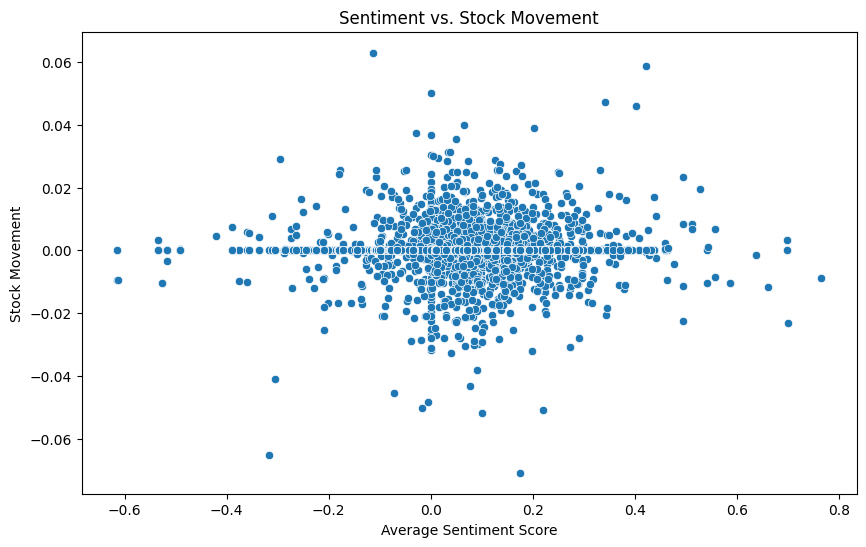

Pearson Correlation Coefficient: 0.009355969898686338


In [35]:
# Compute the correlation coefficient
correlation_coefficient = merged_data['average_sentiment'].corr(merged_data['stock_movement'])

# Create a scatter plot to visualize the relationship between sentiment scores and stock movements
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_sentiment', y='stock_movement', data=merged_data)
plt.title('Sentiment vs. Stock Movement')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Stock Movement')
plt.show()

# Print the correlation coefficient
print("Pearson Correlation Coefficient:", correlation_coefficient)

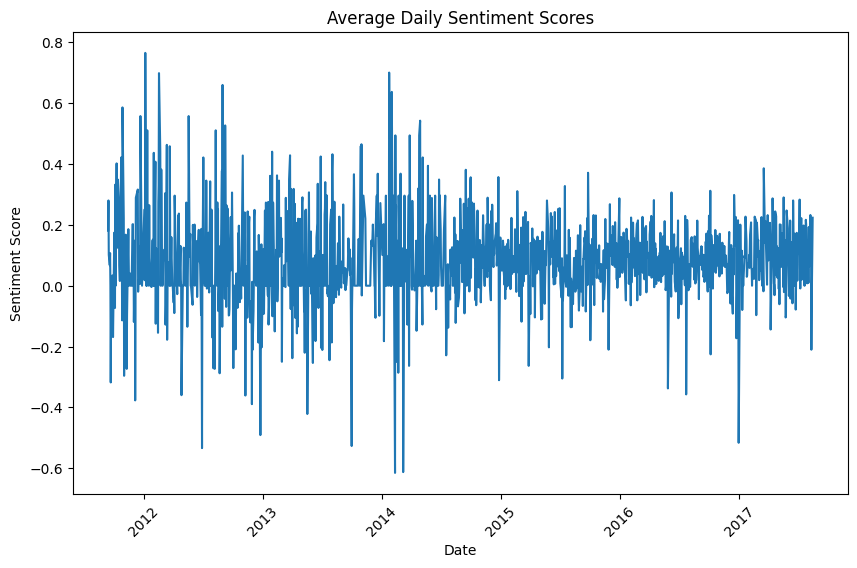

In [33]:
# Compute the average daily sentiment scores
average_sentiment = merged_data.groupby('Date')['headline_sentiment'].mean().reset_index()

# Create a line chart to visualize the average daily sentiment scores
plt.figure(figsize=(10, 6))
plt.plot(average_sentiment['Date'], average_sentiment['headline_sentiment'])
plt.title('Average Daily Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

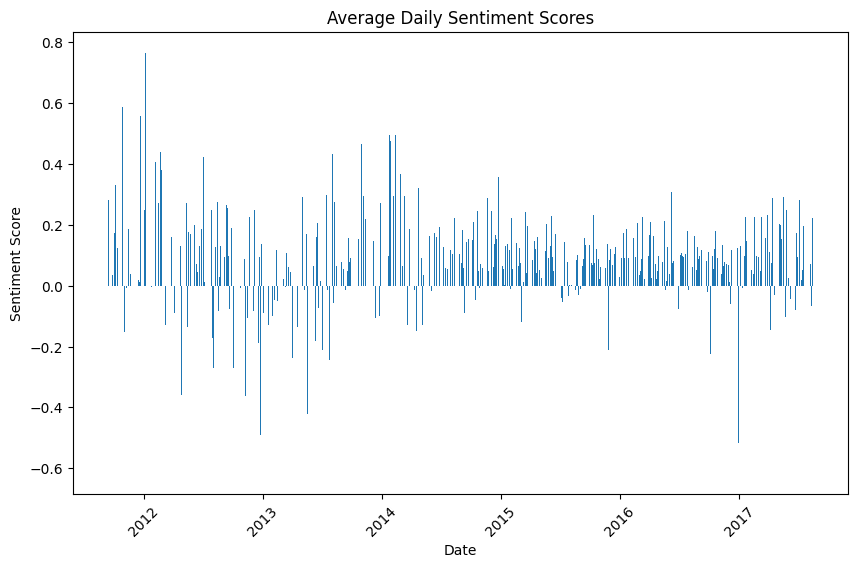

In [30]:
# Creating a bar chart for average daily sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Date'], merged_data['average_sentiment'])
plt.title('Average Daily Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

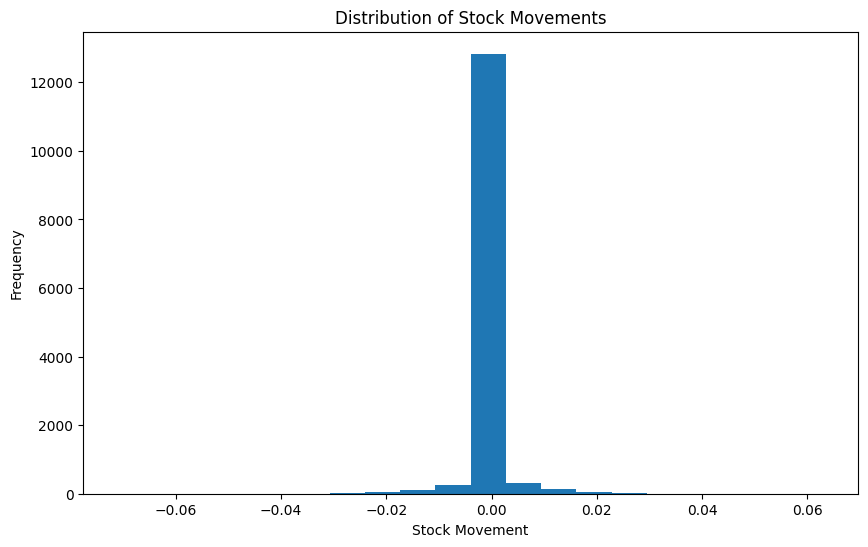

In [32]:
# Creating a histogram for the distribution of stock movements
plt.figure(figsize=(10, 6))
plt.hist(merged_data['stock_movement'], bins=20)
plt.title('Distribution of Stock Movements')
plt.xlabel('Stock Movement')
plt.ylabel('Frequency')
plt.show()

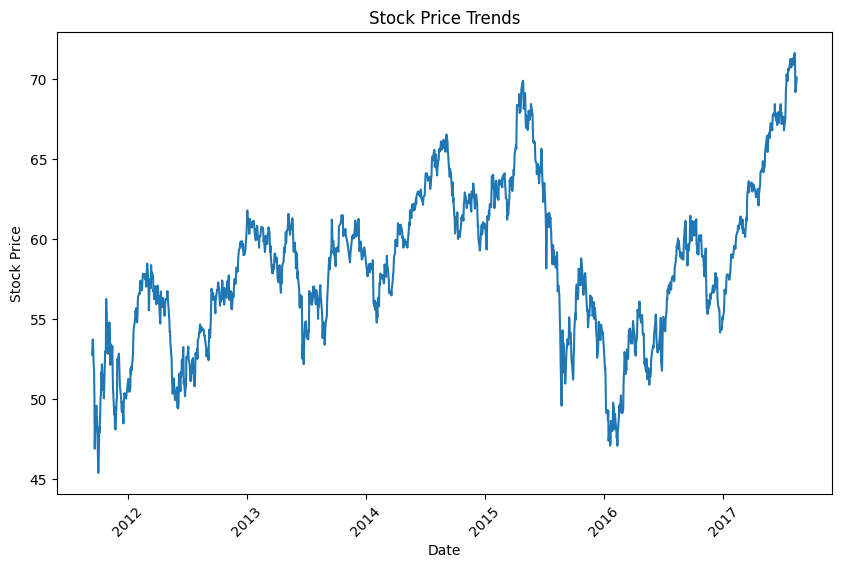

In [36]:
# Plot the stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data['Close'])
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.show()

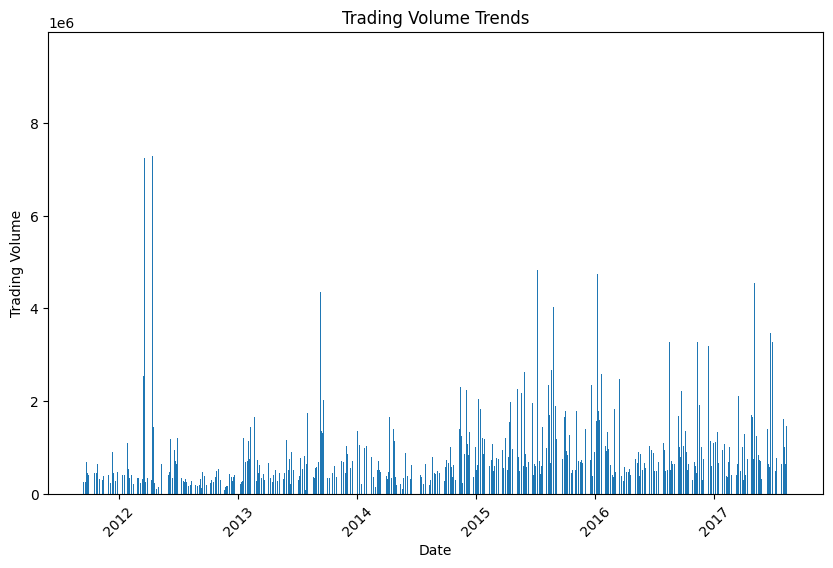

In [37]:
# Plot the trading volume over time
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Date'], merged_data['Volume'])
plt.title('Trading Volume Trends')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.xticks(rotation=45)
plt.show()